In [2]:
from IH_main import *
import matplotlib.pyplot as plt
from IH_data_analysis import Insert_Halo_Data_Analysis

In [3]:
HC_sub = run_insert_halo(zlens = 0.5, zsource = 4, DM_type = "CDM", Mhost = 13.3, geometry_shape = "DOUBLE_CONE", cone_angle_arcsec = 10,
                      idle_run = False, randomization = False, seed = None, LOS_normalization = 1, 
                        host_halo_scale_factor = 0.88, redshift_scale_factor = 1.7, fix_mass_range_sh = True, msub_min = 6, 
                        correlated_clustering = True)

Running Sashimi-CDM


Calculating subhalo properties: 100%|█████████| 128/128 [00:51<00:00,  2.49it/s]


Running pyHalo-CDM


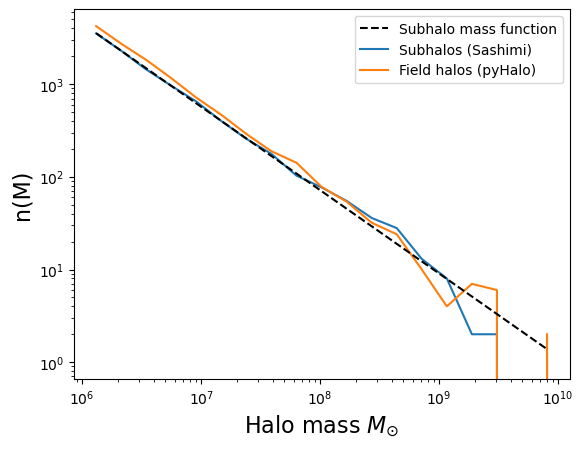

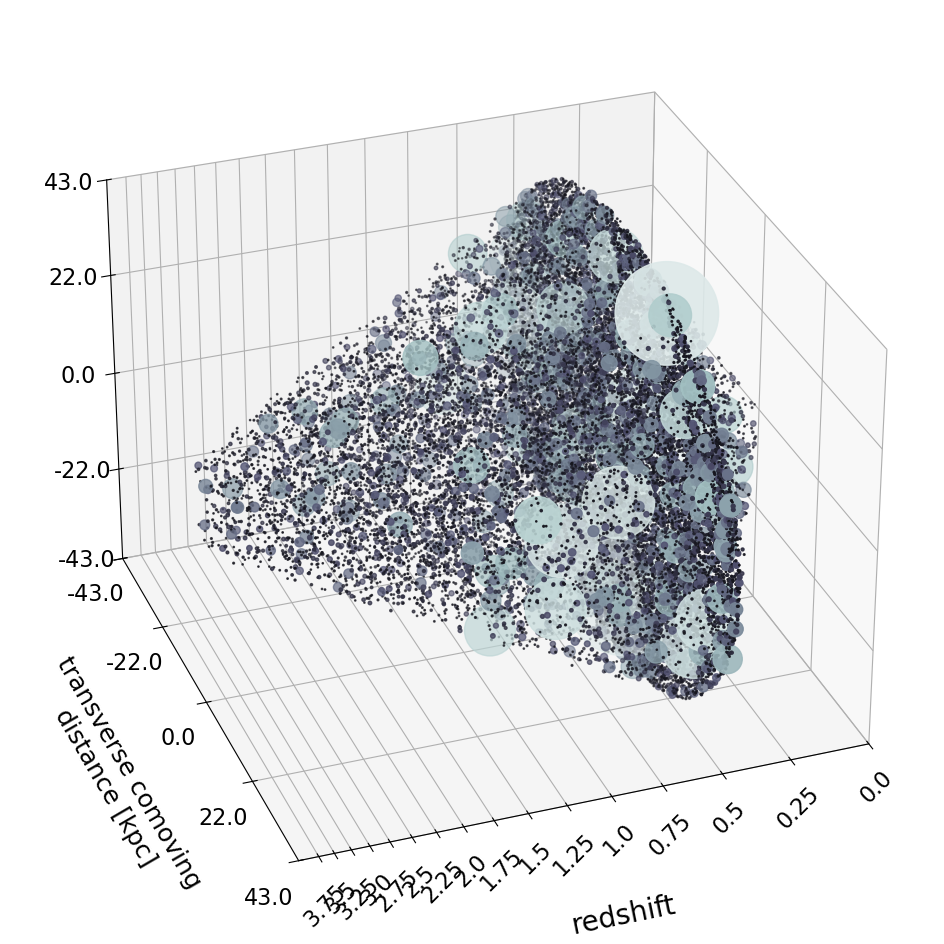

In [4]:
# Using the new Insert_Halo_Data_Analysis class to make a plot of the subhalo mass function and plotting the 3d spatial distribution

DA = Insert_Halo_Data_Analysis(HC_sub)
DA.plot_subhalo_mass_function()
DA.plot_spatial_3d()

In [5]:
cdm_subs_only = HC_sub.PH.cdm


#lens = cdm_subs_only.lensing_quantities()

from lenstronomy.LensModel.lens_model import LensModel

zlens = HC_sub.SDG.IHB.zlens
zsource = HC_sub.SDG.IHB.zsource

lens_model_list0, lens_redshift_array0, kwargs_halos0, _ = cdm_subs_only.lensing_quantities()


astropy_instance = cdm_subs_only.astropy_instance
npix = 120
grid_size = 5
_x = _y = np.linspace(-grid_size, grid_size, npix)
xx, yy = np.meshgrid(_x, _y)
shape0 = xx.shape

# power law plus shear macromodel
kwargs_macromodel = [{'theta_E': 1., 'center_x': 0., 'center_y': 0., 'e1': 0.2, 'e2': -0.1, 'gamma': 2.},
                    {'gamma1': -0.03, 'gamma2': 0.02}]

lens_model_list_macro = ['EPL', 'SHEAR']

lens_model_list_full0 = lens_model_list_macro + lens_model_list0
kwargs_lens_full0 = kwargs_macromodel + kwargs_halos0
lens_redshift_list_full0 = [zlens, zlens] + list(lens_redshift_array0)

lens_model_full0 = LensModel(lens_model_list_full0, zlens, zsource, 
                            lens_redshift_list_full0, 
                             cosmo=astropy_instance, 
                             multi_plane=True)
lens_model_macro = LensModel(lens_model_list_macro)

kappa_full0 = lens_model_full0.kappa(xx.ravel(), yy.ravel(), kwargs_lens_full0).reshape(shape0)
kappa_macro = lens_model_macro.kappa(xx.ravel(), yy.ravel(), kwargs_macromodel).reshape(shape0)

Text(0, 0.5, 'y-position [arcsec]')

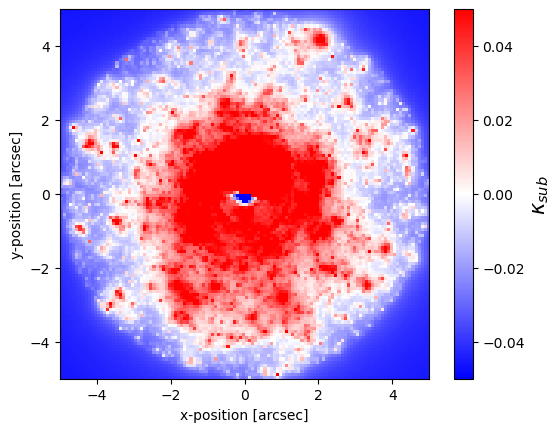

In [6]:
kappa_subs = kappa_full0 - kappa_macro
mean = np.mean(kappa_subs)
v_amp = 0.05
plt.imshow(kappa_subs - np.mean(kappa_subs), 
           vmin = -v_amp, vmax = v_amp, cmap='bwr', 
           extent=[-grid_size, grid_size, -grid_size, grid_size], origin='lower')

cbar = plt.colorbar()
cbar.set_label(r"$\kappa_{sub}$",fontsize=15)
plt.xlabel("x-position [arcsec]")
plt.ylabel("y-position [arcsec]")


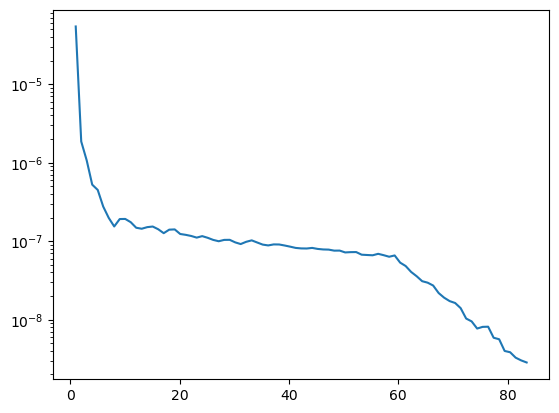

In [7]:
from lenstronomy.Util.correlation import power_spectrum_1d

pspectrum, radius = power_spectrum_1d(kappa_subs)


plt.plot(radius, pspectrum)
plt.yscale("log")